Importing Libraries 

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Natural Language Processing Libraries
import re
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import string
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'

#Required Libraries for Modeling the data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Dataset Preview**

In [ ]:
# dataset
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/COVIDSenti-A.csv")
dataset

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


Dataset consists of the tweets of the response from people w.r.t Corona virus and their reaction are recorded as Positive, Negative Aand Neural.


**Exploratory Data Analysis**

In [ ]:
# Shape of the dataset
print ("The shape of the dataset : ", dataset.shape)

The shape of the dataset :  (30000, 2)


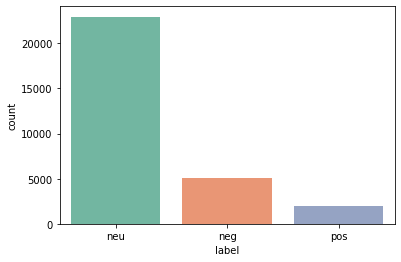

In [ ]:
sns.countplot(x="label", data=dataset,palette = "Set2")
plt.show()

In [ ]:
# Actual tweets
dataset['tweet']

0        Coronavirus | Human Coronavirus Types | CDC ht...
1        @shehryar_taseer That‚Äôs üíØ true , \nCorona...
2        TLDR: Not SARS, possibly new coronavirus. Diff...
3        Disease outbreak news from the WHO: Middle Eas...
4        China - Media: WSJ says sources tell them myst...
                               ...                        
29995    CDC: Re-test confirms Westerdam cruise ship pa...
29996    Two doctors die of coronavirus within 24 hours...
29997    BEIJING - The lockdown of Guo Jing's neighbour...
29998    #CoronavirusOutbreak in #Balochistan !!\n#CPEC...
29999    The Australian dollar has hit a fresh decade l...
Name: tweet, Length: 30000, dtype: object

***Data Pre-Processing***

In [ ]:
#dictionary for all the contractions 

contractions_dict = { 
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "doesn’t": "does not",
  "don't": "do not",
  "don’t": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he had",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it would",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there would",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we would",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we would",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you would",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have",
  "ain’t": "am not",
  "aren’t": "are not",
  "can’t": "cannot",
  "can’t’ve": "cannot have",
  "’cause": "because",
  "could’ve": "could have",
  "couldn’t": "could not",
  "couldn’t’ve": "could not have",
  "didn’t": "did not",
  "doesn’t": "does not",
  "don’t": "do not",
  "don’t": "do not",
  "hadn’t": "had not",
  "hadn’t’ve": "had not have",
  "hasn’t": "has not",
  "haven’t": "have not",
  "he’d": "he had",
  "he’d’ve": "he would have",
  "he’ll": "he will",
  "he’ll’ve": "he will have",
  "he’s": "he is",
  "how’d": "how did",
  "how’d’y": "how do you",
  "how’ll": "how will",
  "how’s": "how is",
  "i’d": "i would",
  "i’d’ve": "i would have",
  "i’ll": "i will",
  "i’ll’ve": "i will have",
  "i’m": "i am",
  "i’ve": "i have",
  "isn’t": "is not",
  "it’d": "it would",
  "it’d’ve": "it would have",
  "it’ll": "it will",
  "it’ll’ve": "it will have",
  "it’s": "it is",
  "let’s": "let us",
  "ma’am": "madam",
  "mayn’t": "may not",
  "might’ve": "might have",
  "mightn’t": "might not",
  "mightn’t’ve": "might not have",
  "must’ve": "must have",
  "mustn’t": "must not",
  "mustn’t’ve": "must not have",
  "needn’t": "need not",
  "needn’t’ve": "need not have",
  "o’clock": "of the clock",
  "oughtn’t": "ought not",
  "oughtn’t’ve": "ought not have",
  "shan’t": "shall not",
  "sha’n’t": "shall not",
  "shan’t’ve": "shall not have",
  "she’d": "she would",
  "she’d’ve": "she would have",
  "she’ll": "she will",
  "she’ll’ve": "she will have",
  "she’s": "she is",
  "should’ve": "should have",
  "shouldn’t": "should not",
  "shouldn’t’ve": "should not have",
  "so’ve": "so have",
  "so’s": "so is",
  "that’d": "that would",
  "that’d’ve": "that would have",
  "that’s": "that is",
  "there’d": "there would",
  "there’d’ve": "there would have",
  "there’s": "there is",
  "they’d": "they would",
  "they’d’ve": "they would have",
  "they’ll": "they will",
  "they’ll’ve": "they will have",
  "they’re": "they are",
  "they’ve": "they have",
  "to’ve": "to have",
  "wasn’t": "was not",
  "we’d": "we would",
  "we’d’ve": "we would have",
  "we’ll": "we will",
  "we’ll’ve": "we will have",
  "we’re": "we are",
  "we’ve": "we have",
  "weren’t": "were not",
  "what’ll": "what will",
  "what’ll’ve": "what will have",
  "what’re": "what are",
  "what’s": "what is",
  "what’ve": "what have",
  "when’s": "when is",
  "when’ve": "when have",
  "where’d": "where did",
  "where’s": "where is",
  "where’ve": "where have",
  "who’ll": "who will",
  "who’ll’ve": "who will have",
  "who’s": "who is",
  "who’ve": "who have",
  "why’s": "why is",
  "why’ve": "why have",
  "will’ve": "will have",
  "won’t": "will not",
  "won’t’ve": "will not have",
  "would’ve": "would have",
  "wouldn’t": "would not",
  "wouldn’t’ve": "would not have",
  "y’all": "you all",
  "y’all": "you all",
  "y’all’d": "you all would",
  "y’all’d’ve": "you all would have",
  "y’all’re": "you all are",
  "y’all’ve": "you all have",
  "you’d": "you would",
  "you’d’ve": "you would have",
  "you’ll": "you will",
  "you’ll’ve": "you will have",
  "you’re": "you are",
  "you’re": "you are",
  "you’ve": "you have",
}
#contractions_re  is the extraction of all the key values from contractions_dict
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [ ]:
# Function to clean the html
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

# Function expand the contractions if  any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [ ]:
# Function to preprocess the articles
def preprocessing(article):
    global article_sent
    
    # Converting to lowercase
    article = article.str.lower()
    
    # Removing the HTML
    article = article.apply(lambda x: cleanhtml(x))
    
    # Removing the email ids
    article = article.apply(lambda x: re.sub('\S+@\S+','', x))
    
    # Removing The URLS
    article = article.apply(lambda x: re.sub("((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?",'', x))
    
    # Removing the '\xa0'
    article = article.apply(lambda x: x.replace("\xa0", " "))
    
    # Removing all the remaining character rather than alphabet and numeric
    article = article.apply(lambda x: re.sub("[^a-z0-9]", " ", x))
    
    # Removing the contractions
    article = article.apply(lambda x: expand_contractions(x))
    
    # Stripping the possessives
    article = article.apply(lambda x: x.replace("'s", ''))
    article = article.apply(lambda x: x.replace('’s', ''))
    article = article.apply(lambda x: x.replace("\'s", ''))
    article = article.apply(lambda x: x.replace("\’s", ''))
    
    # Removing the Trailing and leading whitespace and double spaces
    article = article.apply(lambda x: re.sub(' +', ' ',x))
    
    # Copying the article for the sentence tokenization
    article_sent = article.copy()

    # Removing punctuations from the article
    article = article.apply(lambda x: ''.join(word for word in x if word not in punctuation))
    
    # Removing the Trailing and leading whitespace and double spaces again as removing punctuation might
    # Lead to a white space
    article = article.apply(lambda x: re.sub(' +', ' ',x))
    
    # Removing the Stopwords
    article = article.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
    
    return article

In [ ]:
# column for cleaned tweet text
cleaned=preprocessing(dataset['tweet'])
dataset['clean_tweets']=cleaned

In [ ]:
dataset=dataset.loc[:,['tweet','clean_tweets','label']]
dataset

,tweet,clean_tweets,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,coronavirus human coronavirus types cdc,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",shehryar taseer true corona virus swine flue b...,neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",tldr sars possibly new coronavirus difficult c...,neg
3,Disease outbreak news from the WHO: Middle Eas...,disease outbreak news middle east respiratory ...,neu
4,China - Media: WSJ says sources tell them myst...,china media wsj says sources tell mystery pneu...,neu
...,...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,cdc test confirms westerdam cruise ship passen...,neu
29996,Two doctors die of coronavirus within 24 hours...,two doctors die coronavirus within 24 hours ch...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,beijing lockdown guo jing neighbourhood wuhan ...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,coronavirusoutbreak balochistan cpec route spr...,neu


In [ ]:
dataset['label'].unique()

array(['neu', 'neg', 'pos'], dtype=object)

In [ ]:
# seperating the target variable and features 

X = dataset['clean_tweets']
y = dataset['label']

In [ ]:
dataset['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

In [ ]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [ ]:
# checking the shape of the test and train data
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

X_train shape : (21000,)
X_test shape : (9000,)
y_train shape : (21000,)
y_test shape : (9000,)


In [ ]:
# Dataframe for Train data
df_train = pd.DataFrame()
df_train['Tweets'] = X_train
df_train['label'] = y_train
#print(df_train)
# Dataframe for Test data
df_test = pd.DataFrame()
df_test['Tweets'] = X_test
df_test['label'] = y_test
#print(df_test)

In [ ]:
# Initializing the If-IDF vectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(dataset['clean_tweets'])

X_train_tfidf = tfidf_vect.transform(df_train['Tweets'])
X_test_tfidf = tfidf_vect.transform(df_test['Tweets'])

In [ ]:
# all the vocabulary from the Corpus
print(tfidf_vect.vocabulary_)

{'coronavirus': 1113, 'human': 2265, 'types': 4620, 'cdc': 833, 'true': 4586, 'corona': 1104, 'virus': 4741, 'swine': 4362, 'bird': 613, 'flu': 1893, 'december': 1292, 'whole': 4851, 'busy': 748, 'sars': 3852, 'possibly': 3406, 'new': 3043, 'difficult': 1396, 'confirm': 1049, 'patients': 3266, 'identified': 2293, 'later': 2595, 'infection': 2388, 'disease': 1427, 'outbreak': 3191, 'news': 3049, 'middle': 2886, 'east': 1536, 'respiratory': 3753, 'syndrome': 4368, 'mers': 2867, 'cov': 1168, 'united': 4654, 'arab': 418, 'china': 897, 'media': 2844, 'wsj': 4933, 'says': 3862, 'sources': 4134, 'tell': 4408, 'mystery': 2991, 'pneumonia': 3376, 'something': 4117, 'causing': 822, 'family': 1778, 'virologists': 4738, 'weigh': 4826, 'novel': 3095, 'chinese': 906, 'authorities': 489, 'made': 2754, 'preliminary': 3446, 'ccp': 830, 'keep': 2523, 'saying': 3861, 'unknown': 4660, 'cause': 819, 'obviously': 3119, 'related': 3695, 'let': 2645, 'report': 3730, 'mysterious': 2990, 'illnesses': 2312, 'may

In [ ]:
# Initiating the support vector machine 

svm_model = SVC(probability = True,kernel='linear')
svm_model.fit(X_train_tfidf, y_train )

SVC(kernel='linear', probability=True)

In [ ]:
# Prediction Results for test data

svm_predictions = svm_model.predict(X_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = X_test
test_prediction['label'] = svm_predictions
#test_prediction

In [ ]:
test_prediction['label'].value_counts()

neu    7356
neg    1331
pos     313
Name: label, dtype: int64

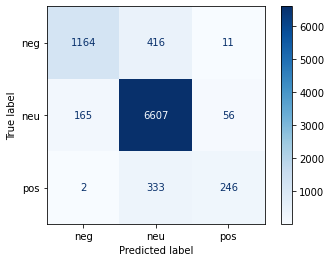

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions,cmap='Blues')

In [ ]:
svm_accuracy = accuracy_score(svm_predictions, y_test)*100
svm_accuracy

89.07777777777778

In [ ]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

         neg       0.87      0.73      0.80      1591
         neu       0.90      0.97      0.93      6828
         pos       0.79      0.42      0.55       581

    accuracy                           0.89      9000
   macro avg       0.85      0.71      0.76      9000
weighted avg       0.89      0.89      0.88      9000

